In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


from scipy import interpolate

In [2]:
#read in the gaia query results
pleiades = pd.read_csv("pleiades-hw4-result.csv", sep = ',')
praesepe = pd.read_csv('praesepe-hw4-result.csv', sep = ',')
hyades = pd.read_csv('hyades-hw4-result.csv', sep = ',')

Plot a parallax histogram

In [3]:
#### PULL OUT PARALLAX COLUMNS ####

pl_prllx = pleiades['parallax'] #in milli-arcseconds
pr_prllx = praesepe['parallax'] #in milli-arcseconds
hy_prllx = hyades['parallax'] #in milli-arcseconds

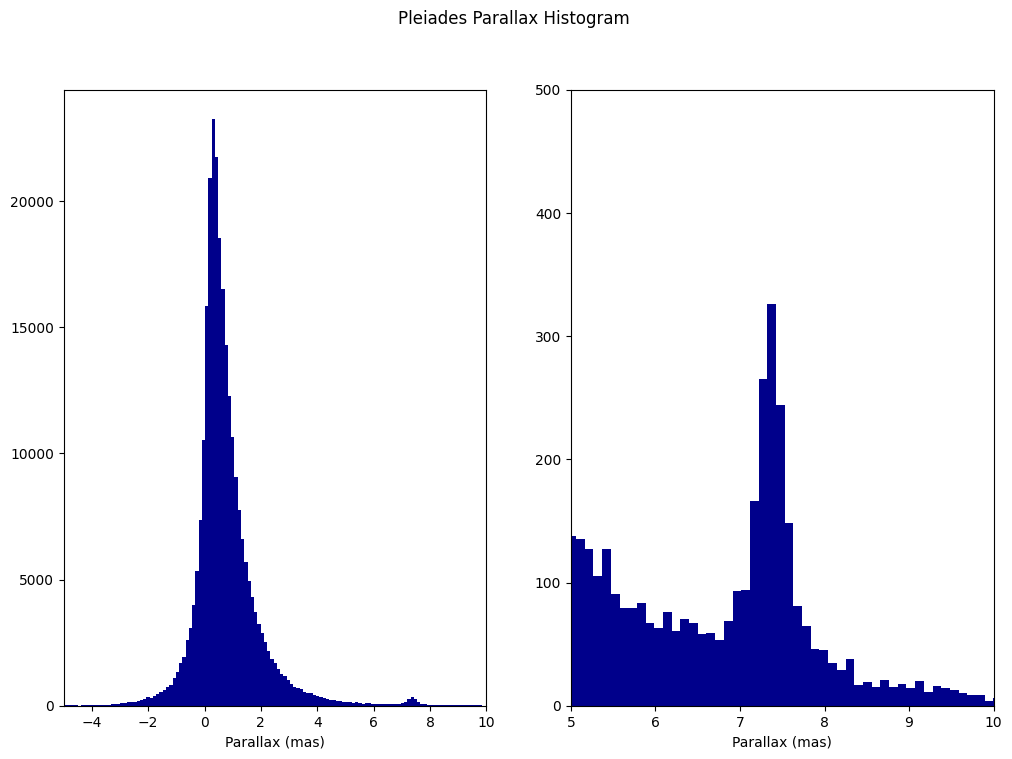

In [4]:
#### PARALLAX HISTOGRAM FOR PLEIADES ####

fig, axs = plt.subplots(1,2, figsize=(12,8), dpi=100)

axs[0].hist(pl_prllx,800, color = 'darkblue')
axs[0].set_xlim(-5, 10)

axs[1].hist(pl_prllx,900, color = 'darkblue')
axs[1].set_xlim(5,10)
axs[1].set_ylim(0,500)


for ax in axs.flat:
    ax.set(xlabel='Parallax (mas)')

fig.suptitle('Pleiades Parallax Histogram')



plt.savefig('pleiades_parallax.jpg', bbox_inches='tight')
plt.show()



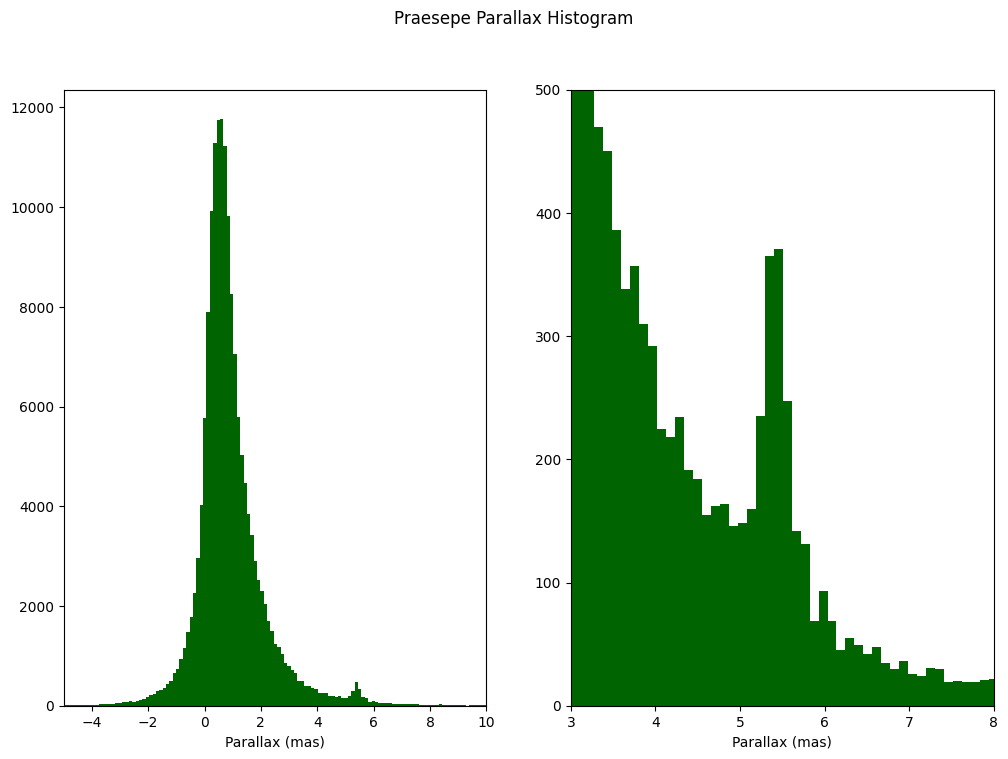

In [5]:
#### PARALLAX HISTOGRAM FOR PRAESEPE ####


fig, axs = plt.subplots(1,2, figsize=(12,8), dpi=100)

axs[0].hist(pr_prllx,800, color = 'darkgreen')
axs[0].set_xlim(-5, 10)

axs[1].hist(pr_prllx,900, color = 'darkgreen')
axs[1].set_xlim(3,8)
axs[1].set_ylim(0,500)


for ax in axs.flat:
    ax.set(xlabel='Parallax (mas)')

fig.suptitle('Praesepe Parallax Histogram')



plt.savefig('praesepe_parallax.jpg', bbox_inches='tight')

plt.show()


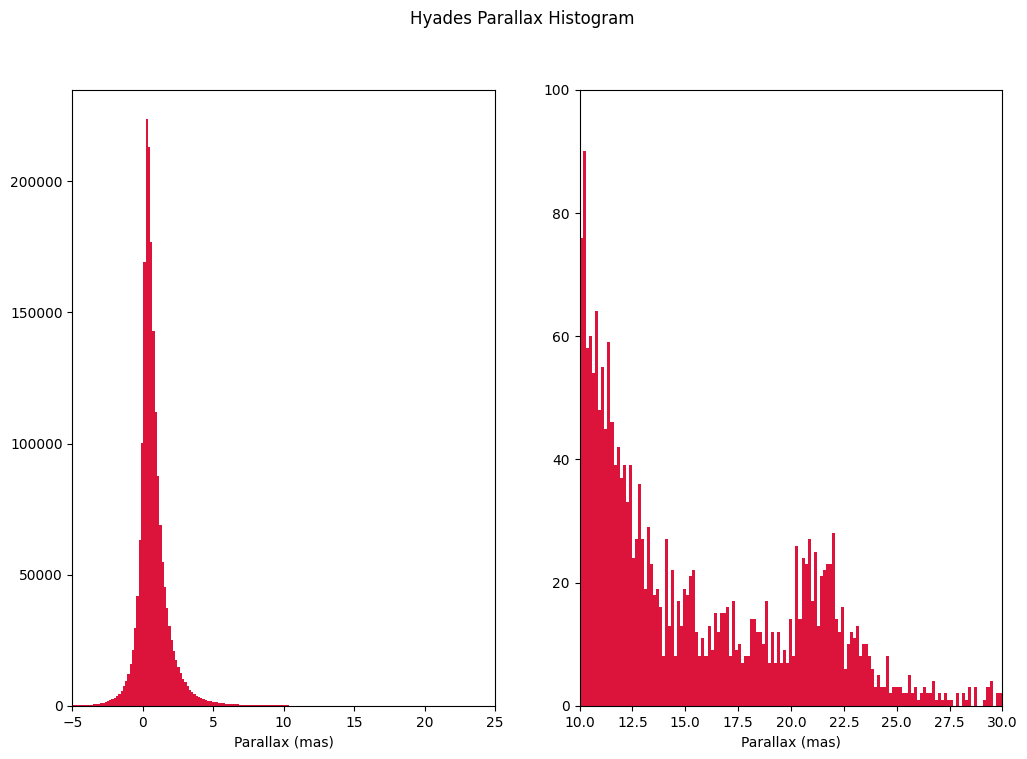

In [6]:
#### PARALLAX HISTOGRAM FOR HYADES ####

fig, axs = plt.subplots(1,2, figsize=(12,8), dpi=100)

axs[0].hist(hy_prllx,800, color = 'crimson')
axs[0].set_xlim(-5, 25)

axs[1].hist(hy_prllx,900, color = 'crimson')
axs[1].set_xlim(10,30)
axs[1].set_ylim(0,100)


for ax in axs.flat:
    ax.set(xlabel='Parallax (mas)')

fig.suptitle('Hyades Parallax Histogram')



plt.savefig('hyades_parallax.jpg', bbox_inches='tight')
plt.show()


In [7]:
#this function assumes that orig_sources is indexable by column names, 
#parameter is a string indicating which column to perform the cut on

def cut (orig_sources, parameter, l_lim, u_lim):    
#     orig_sources = orig_sources.dropna(subset = [parameter]) #drop rows with Nan under the parameter column
    
    par = orig_sources[parameter]
    par = pd.Series.to_numpy(par)
    
    subset = []
    for i in range(len(orig_sources)):
        value = par[i]
        if ((value > l_lim) and (value < u_lim)):
            subset.append(i)
    
#     subset = ((par > l_lim) and (par < u_lim))
            
    col_heads = orig_sources.columns
    new_sources = pd.DataFrame(columns = col_heads)
    
    for i in subset:
        row = orig_sources.iloc[i]
        new_sources = new_sources.append(row) 
#         new_sources = pd.concat([new_sources, row], ignore_index=True)
        
    return new_sources

In [8]:
#### PARALLAX CUTS ####

og_pleiades = pleiades
og_praesepe = praesepe
og_hyades = hyades

pleiades = cut(og_pleiades, 'parallax', 7, 8)
praesepe = cut(og_praesepe, 'parallax', 5,6)
hyades = cut(og_hyades, 'parallax', 18,24)

/var/folders/wv/y9bnhr2x4q98_z1q32p4kwtm0000gn/T/ipykernel_2006/781273653.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_sources = new_sources.append(row)
/var/folders/wv/y9bnhr2x4q98_z1q32p4kwtm0000gn/T/ipykernel_2006/781273653.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_sources = new_sources.append(row)
/var/folders/wv/y9bnhr2x4q98_z1q32p4kwtm0000gn/T/ipykernel_2006/781273653.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_sources = new_sources.append(row)
/var/folders/wv/y9bnhr2x4q98_z1q32p4kwtm0000gn/T/ipykernel_2006/781273653.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_sources = new_sour

/var/folders/wv/y9bnhr2x4q98_z1q32p4kwtm0000gn/T/ipykernel_2006/781273653.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_sources = new_sources.append(row)
/var/folders/wv/y9bnhr2x4q98_z1q32p4kwtm0000gn/T/ipykernel_2006/781273653.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_sources = new_sources.append(row)
/var/folders/wv/y9bnhr2x4q98_z1q32p4kwtm0000gn/T/ipykernel_2006/781273653.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_sources = new_sources.append(row)
/var/folders/wv/y9bnhr2x4q98_z1q32p4kwtm0000gn/T/ipykernel_2006/781273653.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_sources = new_sour

/var/folders/wv/y9bnhr2x4q98_z1q32p4kwtm0000gn/T/ipykernel_2006/781273653.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_sources = new_sources.append(row)
/var/folders/wv/y9bnhr2x4q98_z1q32p4kwtm0000gn/T/ipykernel_2006/781273653.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_sources = new_sources.append(row)
/var/folders/wv/y9bnhr2x4q98_z1q32p4kwtm0000gn/T/ipykernel_2006/781273653.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_sources = new_sources.append(row)
/var/folders/wv/y9bnhr2x4q98_z1q32p4kwtm0000gn/T/ipykernel_2006/781273653.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_sources = new_sour

In [9]:
#### PULLING OUT PROPER MOTIONS ####

pl_mu_ra = pleiades['pmra']
pl_mu_dec = pleiades['pmdec']

pr_mu_ra = praesepe['pmra']
pr_mu_dec = praesepe['pmdec']

hy_mu_ra = hyades['pmra']
hy_mu_dec = hyades['pmdec']

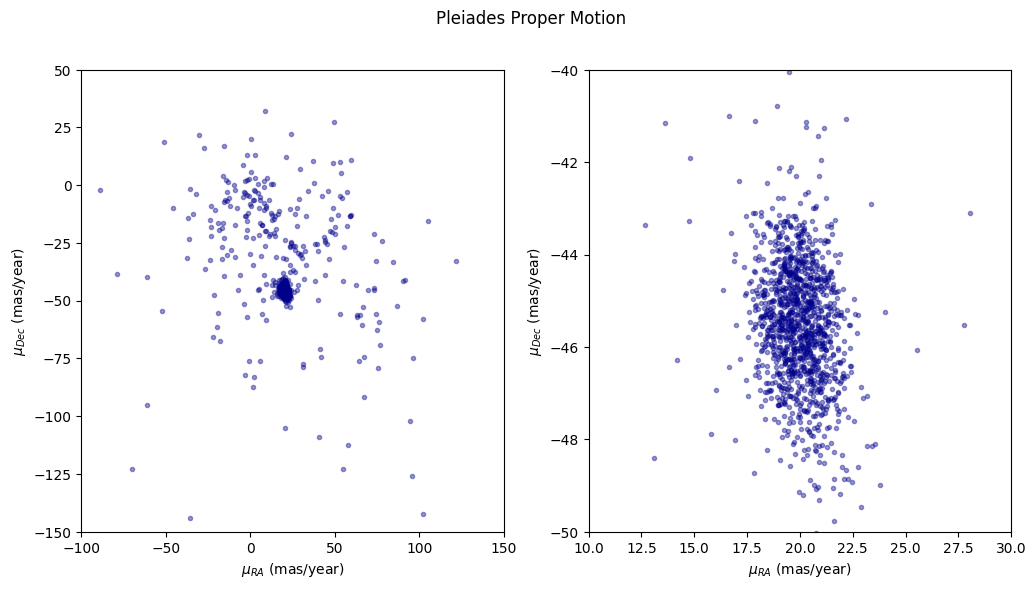

In [30]:
#### PROPER MOTIONS FOR PLEIADES ####

fig, axs = plt.subplots(1,2, figsize=(12,6), dpi=100)

axs[0].scatter(pl_mu_ra, pl_mu_dec, marker = '.', color = 'darkblue', alpha=0.4)
axs[0].set_xlim(-100,150)
axs[0].set_ylim(-150,50)

# #to draw the box
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.3)
# axs[0].text(0.2,0.2, '         \n\n  ', transform=ax.transAxes, fontsize=14,\
#         verticalalignment='top', bbox = props)

axs[1].scatter(pl_mu_ra, pl_mu_dec, marker = '.', color = 'darkblue', alpha=0.4)
axs[1].set_xlim(10,30)
axs[1].set_ylim(-50,-40)

for ax in axs.flat:
    ax.set(xlabel=r'$\mu_{RA}$ (mas/year)',\
          ylabel=r'$\mu_{Dec}$ (mas/year)')

fig.suptitle('Pleiades Proper Motion')



plt.savefig('pleiades_proper_motion.jpg', bbox_inches='tight')
plt.show()


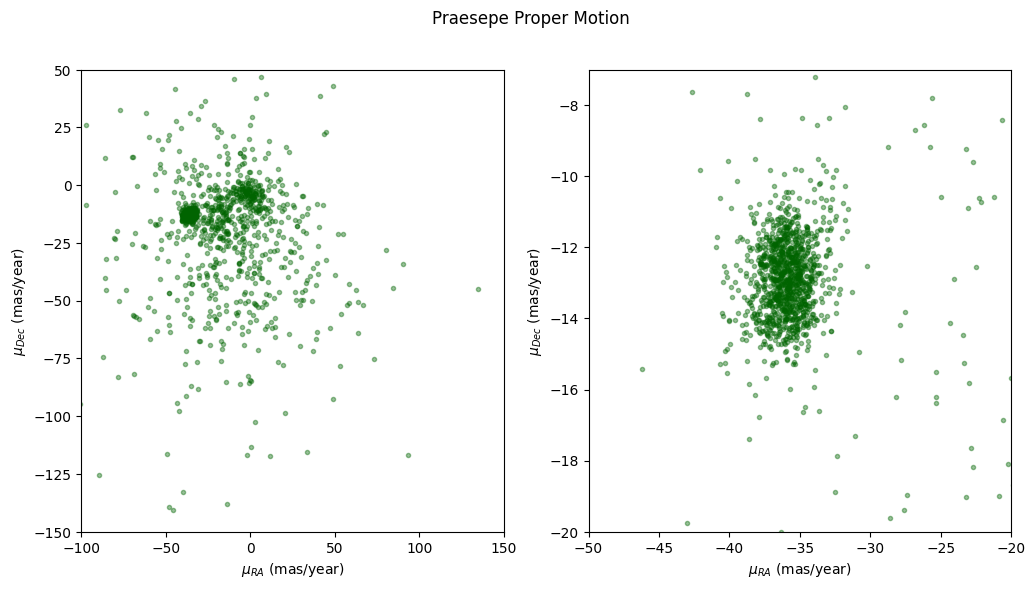

In [29]:
#### PROPER MOTIONS FOR PRAESEPE ####
fig, axs = plt.subplots(1,2, figsize=(12,6), dpi=100)

axs[0].scatter(pr_mu_ra, pr_mu_dec, marker = '.', color = 'darkgreen', alpha=0.4)
axs[0].set_xlim(-100,150)
axs[0].set_ylim(-150,50)

# #to draw the box
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.3)
# axs[0].text(0.2,0.2, '         \n\n  ', transform=ax.transAxes, fontsize=14,\
#         verticalalignment='top', bbox = props)

axs[1].scatter(pr_mu_ra, pr_mu_dec, marker = '.', color = 'darkgreen', alpha=0.4)
axs[1].set_xlim(-50,-20)
axs[1].set_ylim(-20,-7)

for ax in axs.flat:
    ax.set(xlabel=r'$\mu_{RA}$ (mas/year)',\
          ylabel=r'$\mu_{Dec}$ (mas/year)')

fig.suptitle('Praesepe Proper Motion')




plt.savefig('praesepe_proper_motion.jpg', bbox_inches='tight')
plt.show()


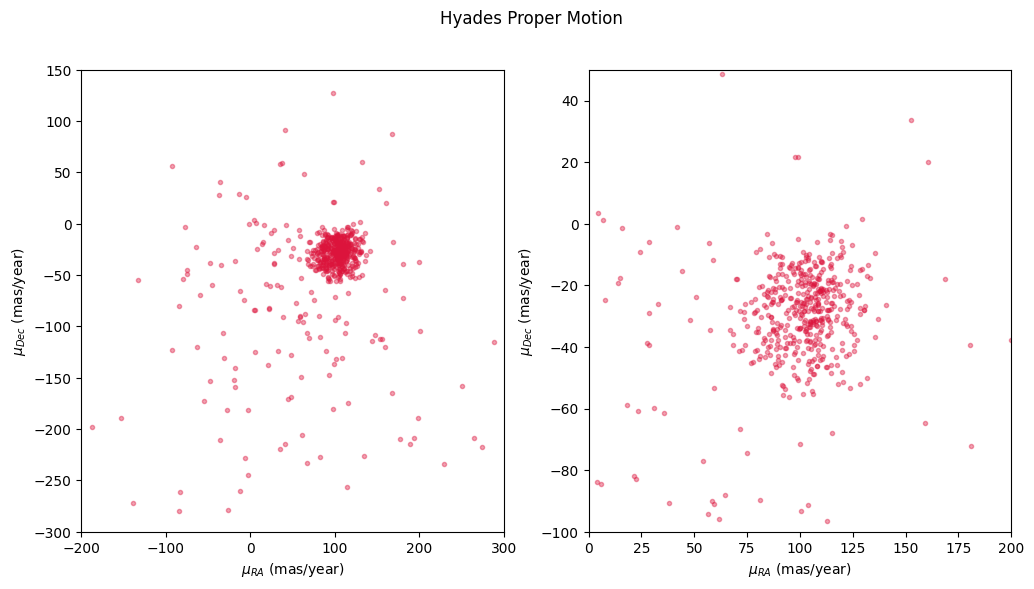

In [28]:
#### PROPER MOTIONS FOR HYADES ####
fig, axs = plt.subplots(1,2, figsize=(12,6), dpi=100)

axs[0].scatter(hy_mu_ra, hy_mu_dec, marker = '.', color = 'crimson', alpha=0.4)
axs[0].set_xlim(-200,300)
axs[0].set_ylim(-300,150)

# #to draw the box
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.3)
# axs[0].text(0.2,0.2, '         \n\n  ', transform=ax.transAxes, fontsize=14,\
#         verticalalignment='top', bbox = props)

axs[1].scatter(hy_mu_ra, hy_mu_dec, marker = '.', color = 'crimson', alpha=0.4)
axs[1].set_xlim(0,200)
axs[1].set_ylim(-100,50)

for ax in axs.flat:
    ax.set(xlabel=r'$\mu_{RA}$ (mas/year)',\
          ylabel=r'$\mu_{Dec}$ (mas/year)')

fig.suptitle('Hyades Proper Motion')




plt.savefig('hyades_proper_motion.jpg', bbox_inches='tight')
plt.show()


In [13]:
# do the proper motion cuts
pl_prllx = pleiades

pl_temp = cut(pl_prllx, 'pmdec', -49, -43)
pleiades = cut(pl_temp, 'pmra', 17, 23)




pr_prllx = praesepe

pr_temp = cut(pr_prllx, 'pmdec', -15, -11)
praesepe = cut(pr_temp, 'pmra', -40, -33)




hy_prllx = hyades

hy_temp = cut(hy_prllx, 'pmdec', -50, 0)
hyades = cut(hy_temp, 'pmra', 75, 130)

/var/folders/wv/y9bnhr2x4q98_z1q32p4kwtm0000gn/T/ipykernel_2006/781273653.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_sources = new_sources.append(row)
/var/folders/wv/y9bnhr2x4q98_z1q32p4kwtm0000gn/T/ipykernel_2006/781273653.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_sources = new_sources.append(row)
/var/folders/wv/y9bnhr2x4q98_z1q32p4kwtm0000gn/T/ipykernel_2006/781273653.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_sources = new_sources.append(row)
/var/folders/wv/y9bnhr2x4q98_z1q32p4kwtm0000gn/T/ipykernel_2006/781273653.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_sources = new_sour

/var/folders/wv/y9bnhr2x4q98_z1q32p4kwtm0000gn/T/ipykernel_2006/781273653.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_sources = new_sources.append(row)
/var/folders/wv/y9bnhr2x4q98_z1q32p4kwtm0000gn/T/ipykernel_2006/781273653.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_sources = new_sources.append(row)
/var/folders/wv/y9bnhr2x4q98_z1q32p4kwtm0000gn/T/ipykernel_2006/781273653.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_sources = new_sources.append(row)
/var/folders/wv/y9bnhr2x4q98_z1q32p4kwtm0000gn/T/ipykernel_2006/781273653.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_sources = new_sour

/var/folders/wv/y9bnhr2x4q98_z1q32p4kwtm0000gn/T/ipykernel_2006/781273653.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_sources = new_sources.append(row)
/var/folders/wv/y9bnhr2x4q98_z1q32p4kwtm0000gn/T/ipykernel_2006/781273653.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_sources = new_sources.append(row)
/var/folders/wv/y9bnhr2x4q98_z1q32p4kwtm0000gn/T/ipykernel_2006/781273653.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_sources = new_sources.append(row)
/var/folders/wv/y9bnhr2x4q98_z1q32p4kwtm0000gn/T/ipykernel_2006/781273653.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_sources = new_sour

/var/folders/wv/y9bnhr2x4q98_z1q32p4kwtm0000gn/T/ipykernel_2006/781273653.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_sources = new_sources.append(row)
/var/folders/wv/y9bnhr2x4q98_z1q32p4kwtm0000gn/T/ipykernel_2006/781273653.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_sources = new_sources.append(row)
/var/folders/wv/y9bnhr2x4q98_z1q32p4kwtm0000gn/T/ipykernel_2006/781273653.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_sources = new_sources.append(row)
/var/folders/wv/y9bnhr2x4q98_z1q32p4kwtm0000gn/T/ipykernel_2006/781273653.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_sources = new_sour

In [14]:
#define a function to convert between parallax & distance
def parDist (arrow, d = None, p = None):
    #arrow = 'get p' converts from d -> p
    #arrow = 'get d' converts p -> d
    
    #assume p is in milliarcsec
    
    if arrow == 'get p':
        p = (1/d)*1000
        return p
    
    elif arrow == 'get d':
        d = 1000/p
        return d      

In [15]:
#define a function to convert between apparent magnitude, absolute
#magnitude, and distance

def distanceModulus (arrow, app = None, Abs = None, d = None):
    #arrow = 'get app' converts from Abs -> app using d
    #arrow = 'get Abs' converts from app -> Abs using d
    #arrow = 'get d' calculates d using app & Abs mags
    
    #assume d is in parsec
    log = np.log10
    
    if arrow == 'get app':
        app = (5*log(d/10)) + Abs
        return app
        
    elif arrow == 'get Abs':
        Abs = app - (5*log(d/10))
        return Abs
            
    elif arrow == 'get d':
        exp = 1 + (app - Abs)/5
        d = 10**(exp)
        return d

In [16]:
# pull out bp-rp color and apparent g magnitude

#### pleiades
pl_bprp = pleiades['bp_rp']
pl_gmag_app = pleiades['phot_g_mean_mag'] 
# calculate absolute magnitudes
pl_dist = parDist('get d', p=7.5)
pl_gmag = distanceModulus('get Abs', app=pl_gmag_app, d=pl_dist)



### praesepe
pr_bprp = praesepe['bp_rp']
pr_gmag_app = praesepe['phot_g_mean_mag'] 
# calculate absolute magnitudes
pr_dist = parDist('get d', p=5.5)
pr_gmag = distanceModulus('get Abs', app=pr_gmag_app, d=pr_dist)


### hyades
hy_bprp = hyades['bp_rp']
hy_gmag_app = hyades['phot_g_mean_mag'] 
# calculate absolute magnitudes
hy_dist = parDist('get d', p=21)
hy_gmag = distanceModulus('get Abs', app=hy_gmag_app, d=hy_dist)


In [17]:
# #to create a fit line through the main sequence of the three clusters



### first try: np.polyfit

# #first combine into a color & a gmag array

# main_sq_gmag = np.concatenate((pl_gmag, pr_gmag, hy_gmag))
# main_sq_bprp = np.concatenate((pl_bprp, pr_bprp, hy_bprp))

# #clean out nans
# nans = np.where(np.isnan(main_sq_bprp))[0] #bprp has most of nans

# main_sq_bprp = np.delete(main_sq_bprp, nans)
# main_sq_gmag = np.delete(main_sq_gmag, nans)


# main_sq_bprp.sort()
# main_sq_gmag.sort()

# #calculate fit
# main_sq_fit = np.polyfit(main_sq_bprp, main_sq_gmag, 1)
# a1, a0 = main_sq_fit[0], main_sq_fit[1]

# fit = (main_sq_bprp)*a1 + a0



### second try: b-spline

#first put all the data together & sort (splerp wants x sorted)
all_gmag = np.concatenate((pl_gmag, pr_gmag, hy_gmag))
all_bprp = np.concatenate((pl_bprp, pr_bprp, hy_bprp))


#put into data frame so sorting x doesn't mess up which bprps go with which gmags
all_data = {'bp-rp': all_bprp , 'gmag': all_gmag}
all_data = pd.DataFrame(all_data)
#drop nans & sort
all_data = all_data.dropna(subset=['bp-rp','gmag'])
all_data = all_data.sort_values('bp-rp')



ms_bprp = []
ms_gmag = []


#for the next part, first select only stars on the main sequence
for ind in all_data.index:
    color = all_data['bp-rp'][ind]
    gmag = all_data['gmag'][ind]
   
    if not((color < 0) or \
           ((gmag<2) and (color>0)) or \
            (gmag> 4+color*2.5)):
#            (gmag> 3+color*3)):

        
        ms_bprp.append(color)
        ms_gmag.append(gmag)
    
#turn into arrays from lists
ms_bprp = np.array(ms_bprp)
ms_gmag = np.array(ms_gmag)



#calculate the spline fit
tck = interpolate.splrep(ms_bprp, ms_gmag, s=180, k=1)
x_fit = np.linspace(np.min(ms_bprp), np.max(ms_bprp), len(ms_bprp))
y_fit = interpolate.BSpline(*tck)(ms_bprp)

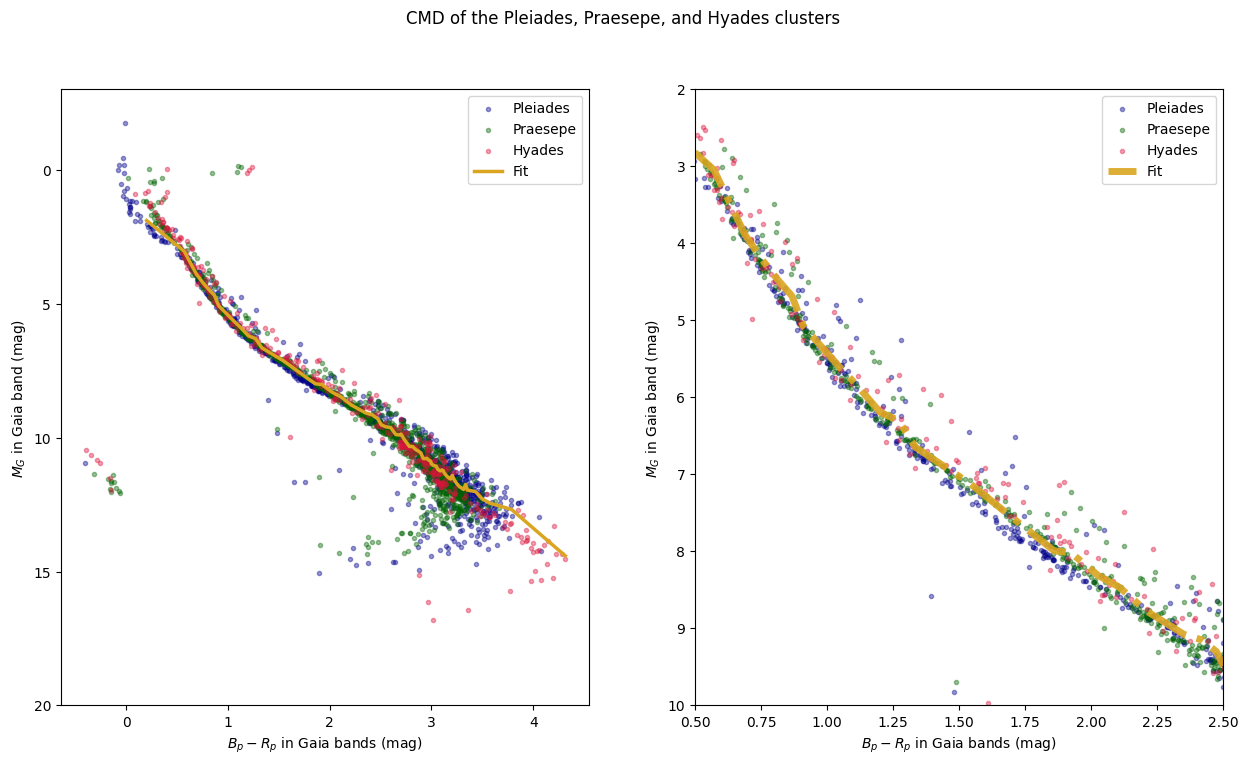

In [27]:
#### HR DIAGRAM ####
fig, axs = plt.subplots(1,2, figsize=(15,8), dpi=100)


#clusters
#full cmd
axs[0].scatter(pl_bprp, pl_gmag, color = 'darkblue', \
            marker = '.', alpha=0.4, label = 'Pleiades')


axs[0].scatter(pr_bprp, pr_gmag, color = 'darkgreen', \
            marker = '.', alpha=0.4, label = 'Praesepe')


axs[0].scatter(hy_bprp, hy_gmag, color = 'crimson', \
            marker = '.', alpha=0.4, label = 'Hyades')

# axs[0].scatter(ms_bprp, ms_gmag, color = 'crimson', \
#             marker = '.', alpha=0.4, label = 'all data')

#fit line
axs[0].plot(ms_bprp, y_fit, color = 'goldenrod', \
         label = 'Fit', linewidth=2.5)
axs[0].set_ylim(20,-3)

axs[0].legend()


#zoomed in cmd
axs[1].scatter(pl_bprp, pl_gmag, color = 'darkblue', \
            marker = '.', alpha=0.4, label = 'Pleiades')


axs[1].scatter(pr_bprp, pr_gmag, color = 'darkgreen', \
            marker = '.', alpha=0.4, label = 'Praesepe')


axs[1].scatter(hy_bprp, hy_gmag, color = 'crimson', \
            marker = '.', alpha=0.4, label = 'Hyades')
axs[1].plot(ms_bprp, y_fit, color = 'goldenrod',\
        label = 'Fit', alpha=0.9,linewidth=5, linestyle='-.')

axs[1].set_xlim(0.5, 2.5)
axs[1].set_ylim(10, 2)
axs[1].legend()





###



for ax in axs.flat:
    ax.set(xlabel=r'$B_p - R_p$ in Gaia bands (mag)',\
          ylabel = r'$M_G$ in Gaia band (mag)')
    

plt.suptitle('CMD of the Pleiades, Praesepe, and Hyades clusters')


plt.savefig('cmds_with_fit.jpg', bbox_inches='tight')
plt.show()


In [19]:
def magtoLratio (m1m2): #m1m2 = m1-m2
    exp = -0.4*m1m2
    
    L1L2 = 10**exp
    return L1L2 #L1L2 = L1/L2

In [20]:
#calculate the residuals then plot them
residuals = ms_gmag - y_fit

#calculate L ratio
lumRatio = magtoLratio(residuals)

#turn L ratio into a histogram
counts,bins = np.histogram(lumRatio,60)

#from plotting below, can see a distinct peak between 2 and 3
#want to count up how many stars are there
total_stars = np.nansum(counts)
i_start = np.argmin(abs(bins-1.5))

binaries = np.nansum(counts[i_start:])

binary_frac = binaries/total_stars

#this gives the L_data/L_model

In [21]:
binary_frac

0.09532798489853704

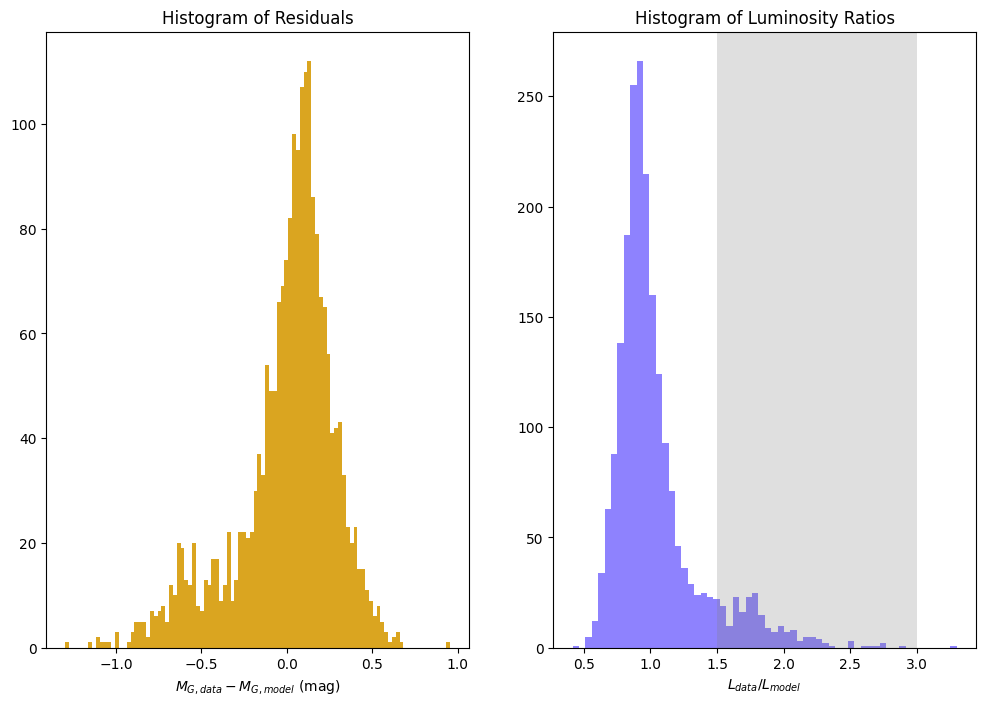

In [26]:
# ### RESIDUALS ###

fig, axs = plt.subplots(1,2, figsize=(12,8), dpi=100)

axs[0].hist(residuals, 100, color = 'goldenrod')
axs[0].set_title('Histogram of Residuals')
axs[0].set_xlabel(r'$M_{G,data} - M_{G,model}$ (mag)')
# axs[0].axvspan(-0.5, 0.5, color='xkcd:sky', alpha=0.2, lw=0)
# axs[0].axvspan(0.5, 2, color='grey', alpha=0.25, lw=0)



##


axs[1].stairs(counts,bins, color = 'xkcd:periwinkle', fill=True)
axs[1].axvspan(1.5, 3, color='grey', alpha=0.25, lw=0)
axs[1].set_title('Histogram of Luminosity Ratios')
axs[1].set_xlabel(r'$L_{data} / L_{model}$')


plt.savefig('residual_lum_histograms.jpg', bbox_inches='tight')


plt.show()



In [64]:
len(residuals)

2119